# Q1

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv("q1.csv")

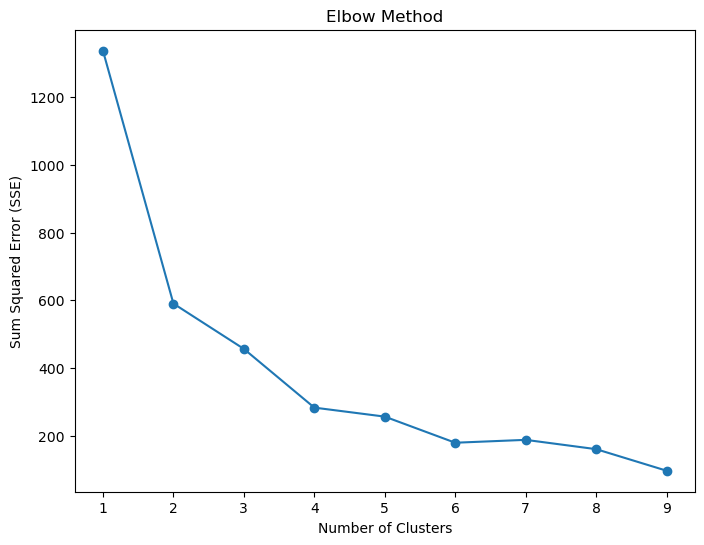

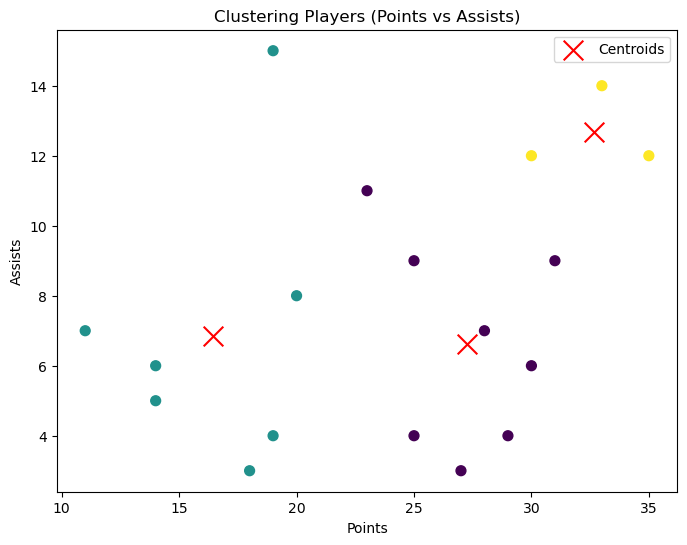

In [9]:
# Convert DataFrame to a numpy array for easier manipulation
data_array = df.values

# Define number of clusters
k = 3

# Helper function to calculate Euclidean distance between two points
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

# Initialize centroids randomly
def initialize_centroids(data, k):
    centroids = data.copy()
    np.random.shuffle(centroids)
    return centroids[:k]

# Assign each data point to the nearest centroid
def assign_clusters(data, centroids):
    clusters = []
    for point in data:
        distances = [euclidean_distance(point, centroid) for centroid in centroids]
        cluster = np.argmin(distances)
        clusters.append(cluster)
    return clusters

# Update centroids based on the mean of the assigned data points
def update_centroids(data, clusters, k):
    new_centroids = []
    for i in range(k):
        cluster_points = [data[j] for j in range(len(data)) if clusters[j] == i]
        new_centroid = np.mean(cluster_points, axis=0)
        new_centroids.append(new_centroid)
    return new_centroids

# Run K-means algorithm
def kmeans(data, k, max_iterations=100):
    centroids = initialize_centroids(data, k)
    for _ in range(max_iterations):
        clusters = assign_clusters(data, centroids)
        new_centroids = update_centroids(data, clusters, k)
        if np.array_equal(centroids, new_centroids):
            break
        centroids = new_centroids
    return np.array(centroids), clusters

# Calculate SSE for different numbers of clusters
def calculate_sse(data, k_range, max_iterations=100):
    sse_values = []
    for k in k_range:
        centroids, clusters = kmeans(data, k, max_iterations)
        sse = 0
        for i in range(len(data)):
            cluster_idx = clusters[i]
            sse += euclidean_distance(data[i], centroids[cluster_idx])**2
        sse_values.append(sse)
    return sse_values

# Define range of clusters to test
k_values = range(1, 10)

# Calculate SSE for each value of k
sse_results = calculate_sse(data_array, k_values)

# Plotting SSE for different number of clusters
plt.figure(figsize=(8, 6))
plt.plot(k_values, sse_results, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum Squared Error (SSE)')
plt.title('Elbow Method')
plt.show()

# Perform K-means clustering for the optimal k value
optimal_k = 3  # You can choose the optimal value based on the SSE plot
final_centroids, final_clusters = kmeans(data_array, optimal_k)

# Plotting clusters in different colors
plt.figure(figsize=(8, 6))
plt.scatter(df['points'], df['assists'], c=final_clusters, cmap='viridis', s=50)
plt.scatter(final_centroids[:, 0], final_centroids[:, 1], c='red', marker='x', s=200, label='Centroids')
plt.xlabel('Points')
plt.ylabel('Assists')
plt.title('Clustering Players (Points vs Assists)')
plt.legend()
plt.show()

# Q2

/tmp/ipykernel_7774/1176378181.py:51: RuntimeWarning: Mean of empty slice.
  centroids = np.array([points[labels == c].mean(axis=0) for c in range(1, k + 1)])


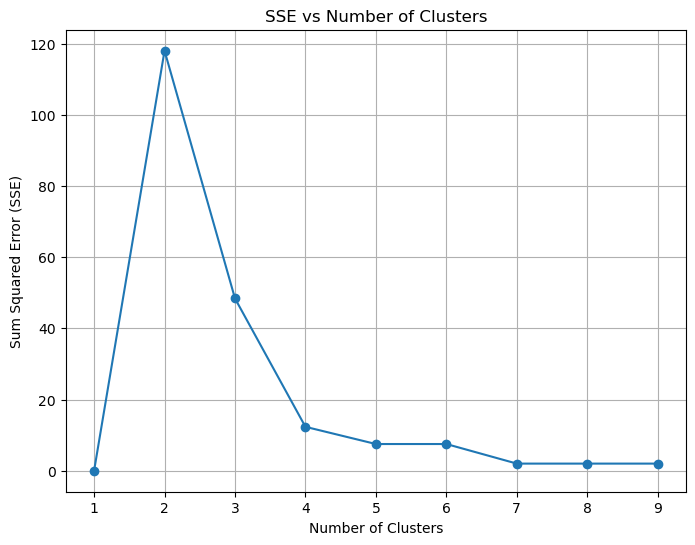

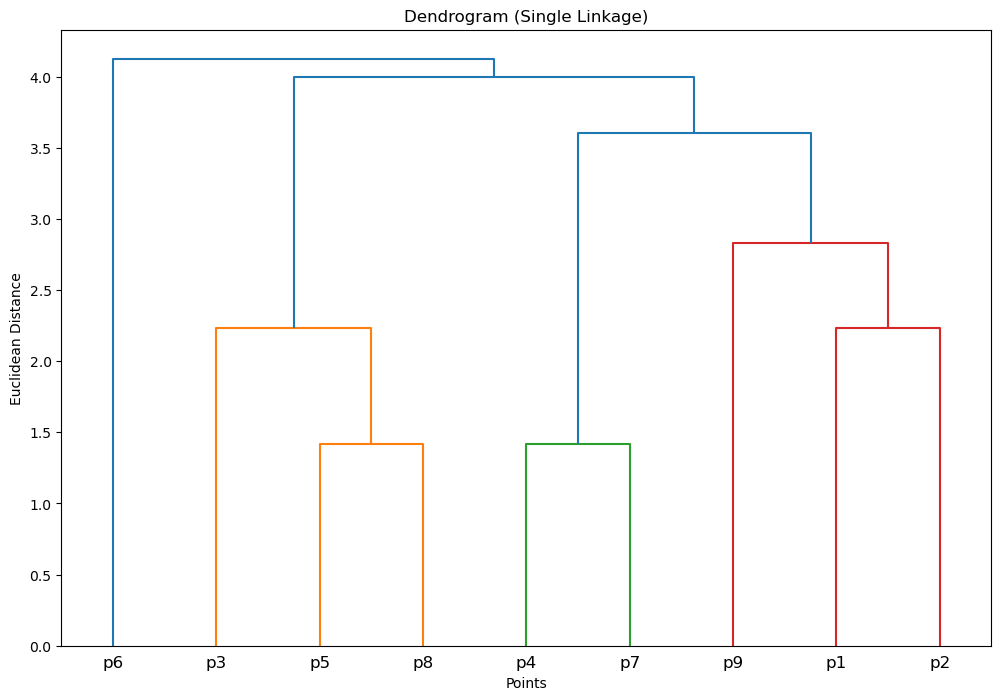

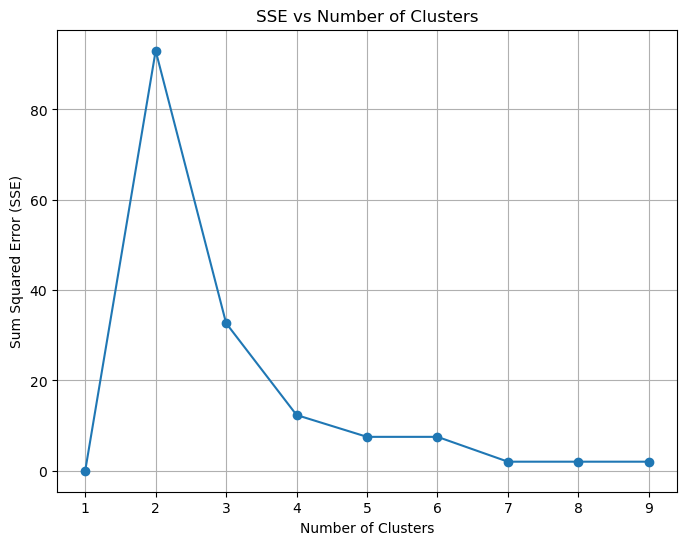

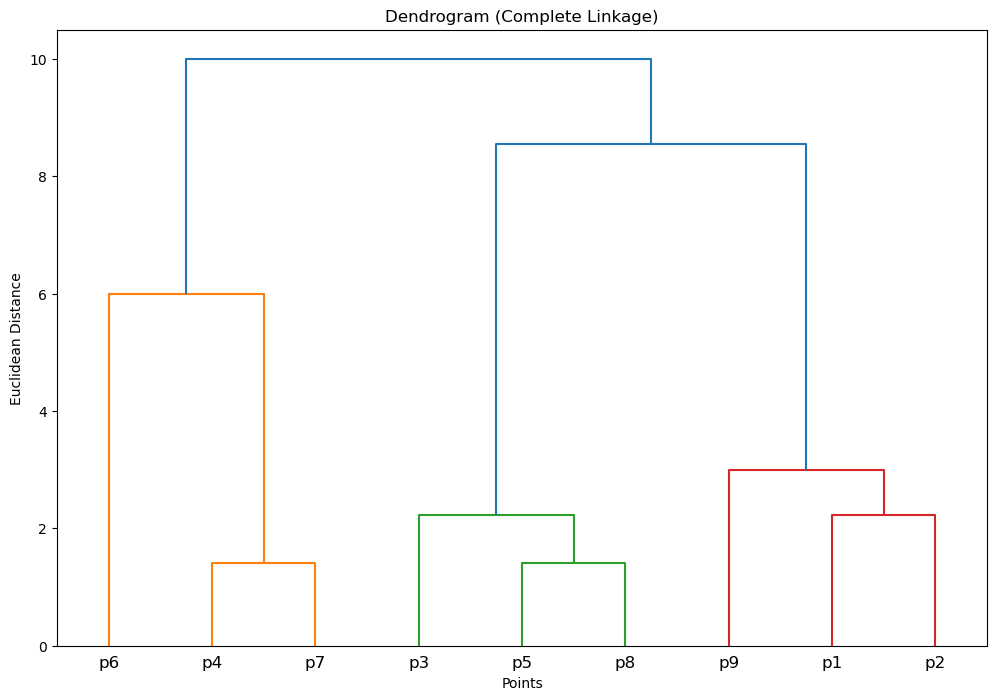

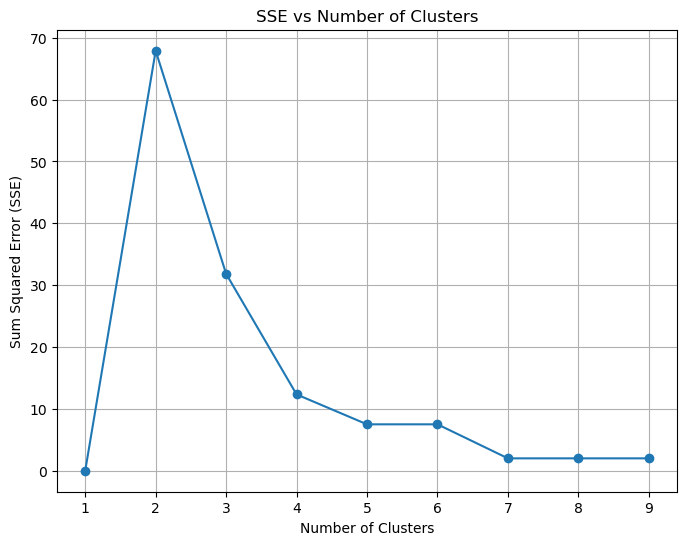

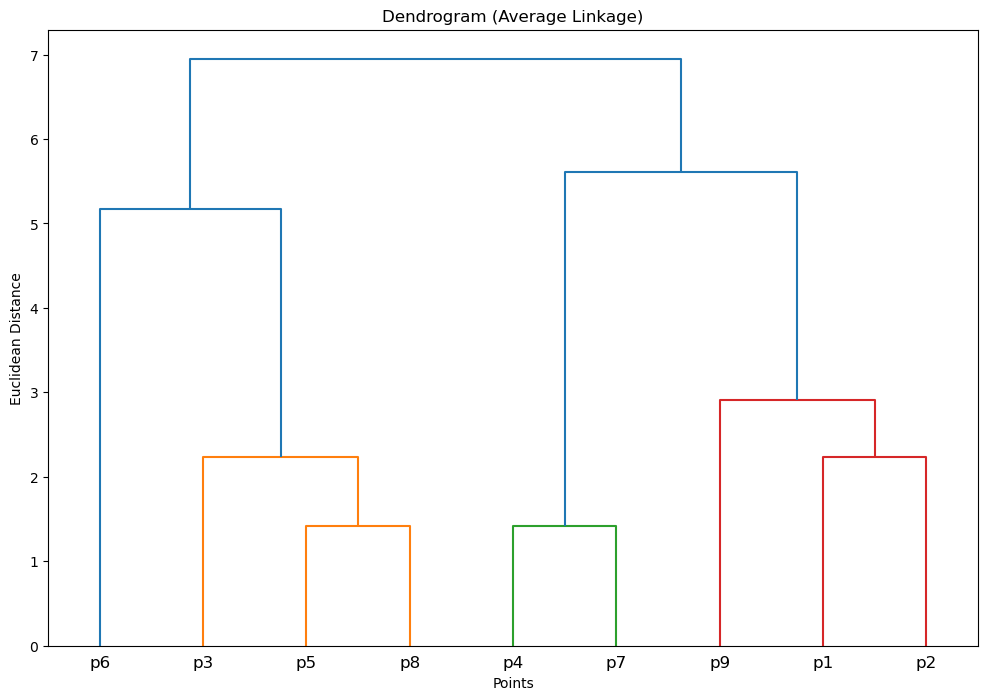

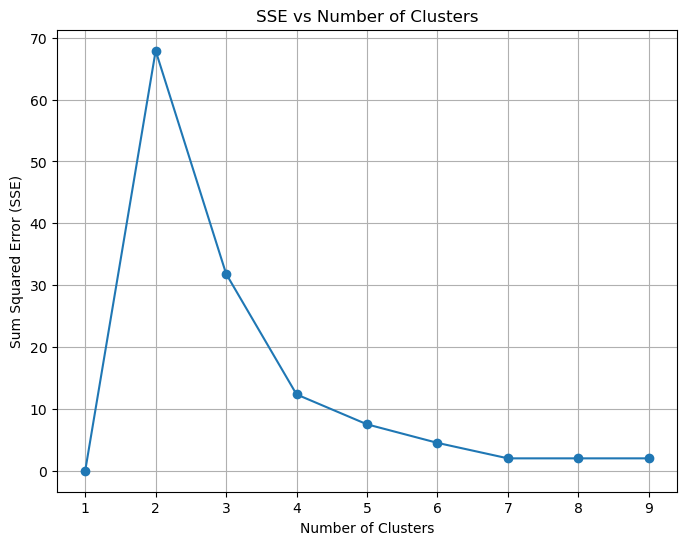

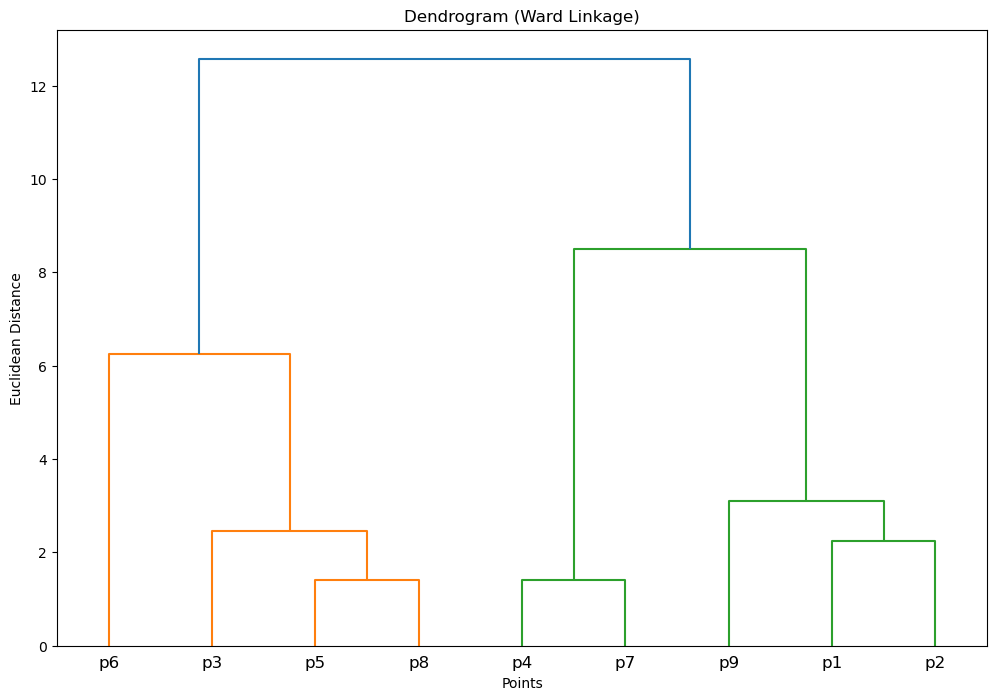

Cluster 1: Points ['p3', 'p5', 'p6', 'p8']
Cluster 2: Points ['p4', 'p7']
Cluster 3: Points ['p1', 'p2', 'p9']


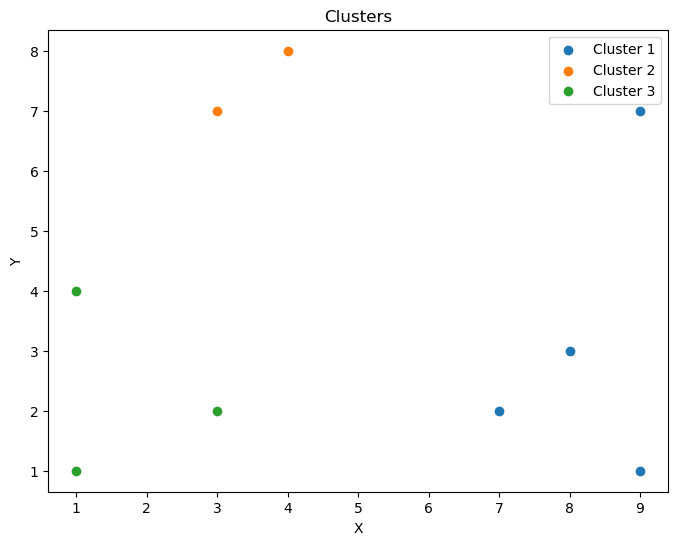

In [21]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.spatial.distance import pdist

# Data
data = {
    'p1': [1, 1],
    'p2': [3, 2],
    'p3': [9, 1],
    'p4': [3, 7],
    'p5': [7, 2],
    'p6': [9, 7],
    'p7': [4, 8],
    'p8': [8, 3],
    'p9': [1, 4]
}

points = np.array([data[point] for point in data])

# Function to calculate SSE
def calculate_sse(cluster_labels, centroids, points):
    sse = 0
    for i, point in enumerate(points):
        cluster_label = cluster_labels[i]
        centroid = centroids[cluster_label - 1]
        sse += np.sum((point - centroid) ** 2)
    return sse

# Function to plot SSE against number of clusters
def plot_sse(clusters, sse):
    plt.figure(figsize=(8, 6))
    plt.plot(clusters, sse, marker='o')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Sum Squared Error (SSE)')
    plt.title('SSE vs Number of Clusters')
    plt.grid(True)
    plt.show()

# Calculate Euclidean distances and perform hierarchical clustering
distances = pdist(points)
methods = ['single', 'complete', 'average', 'ward']
sse_values = []

for method in methods:
    Z = linkage(points, method=method)
    clusters = range(1, len(points) + 1)
    sse = [0]  # Initialize SSE for 1 cluster (single cluster)
    for k in clusters[1:]:
        labels = fcluster(Z, k, criterion='maxclust')
        centroids = np.array([points[labels == c].mean(axis=0) for c in range(1, k + 1)])
        sse.append(calculate_sse(labels, centroids, points))
    sse_values.append(sse)

    # Plot SSE vs Number of Clusters
    plot_sse(clusters, sse)

    # Plot Dendrogram
    plot_dendrogram(method)

# Display clusters along with points
chosen_method = 'ward'  # Change this to choose the method for clustering
Z = linkage(points, method=chosen_method)
labels = fcluster(Z, 3, criterion='maxclust')  # Change the number of clusters as needed
clusters = np.unique(labels)
for cluster in clusters:
    points_indices = np.where(labels == cluster)[0]  # Get indices of points in the cluster
    points_in_cluster = [list(data.keys())[i] for i in points_indices]  # Get point names
    print(f"Cluster {cluster}: Points {points_in_cluster}")# Plotting clusters
plt.figure(figsize=(8, 6))
for cluster in clusters:
    plt.scatter(points[labels == cluster][:, 0], points[labels == cluster][:, 1], label=f'Cluster {cluster}')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Clusters')
plt.legend()
plt.show()